# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm

In [2]:
# Importar e tratar dados
data = sns.load_dataset("tips")
data['tip_pct'] = data['tip'] / (data['total_bill'] - data['tip'])
data['net_bill'] = data['total_bill'] - data['tip']
data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.64e-20
Time:                        14:27:12   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

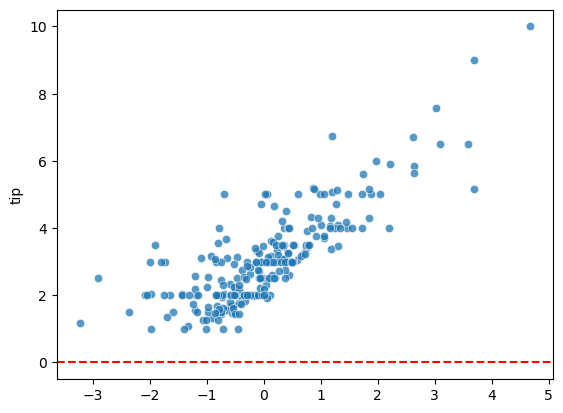

In [32]:
# Criar a matriz design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', data)

model = sm.OLS(y, X).fit()
sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        14:28:17   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

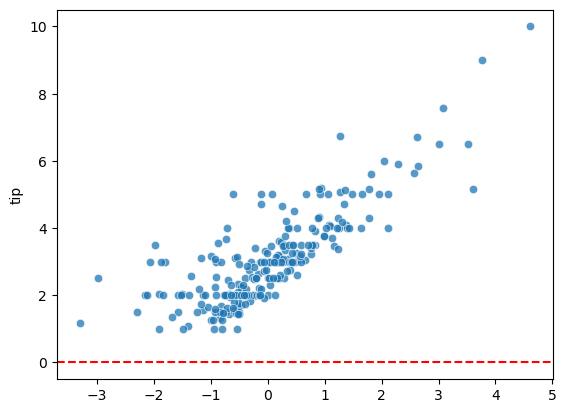

In [33]:
# Levando em conta o p-value para a significancia estatística dos dados, 
# a variável net_bill apresenta-se como a única candidata ( valores inferiores a 0.05 ou 5%)

y, X = patsy.dmatrices('tip ~ net_bill + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.40e-20
Time:                        14:30:26   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

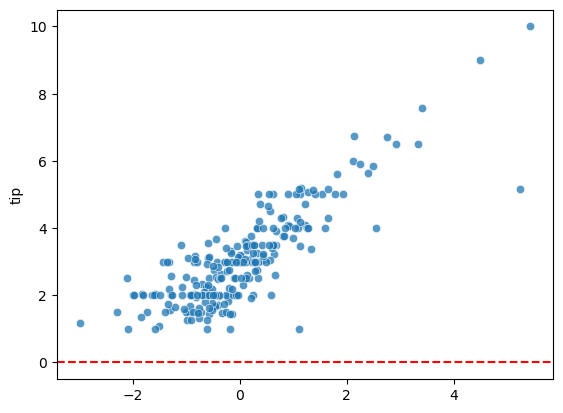

In [37]:
# Testando a transformação dos dados net_bill para log

y, X = patsy.dmatrices('tip ~ np.log(net_bill) + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.96e-22
Time:                        14:37:03   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

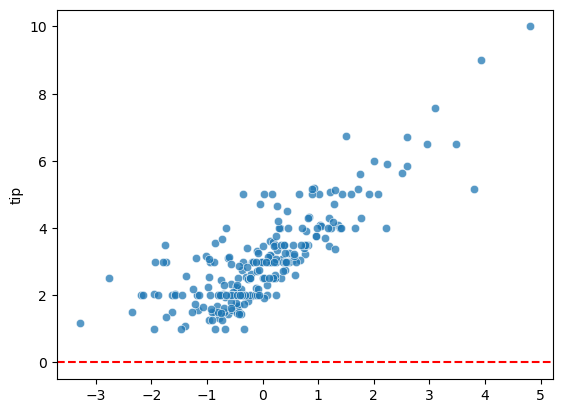

In [51]:
# Testando a transformação dos dados net_bill para polinômio

y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2) + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

- Ao se trabalhar com a transformação polinomial dos dados net_bill, vemos uma leve melhora em relação ao R2, mas se tratando do s resíduos é possível observar que o modelo proposto ainda não alcançou sua melhor representatividade, visto que é possível identificar um formato geometrico no seu gráfico de resíduo.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.21e-18
Time:                        14:35:42   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

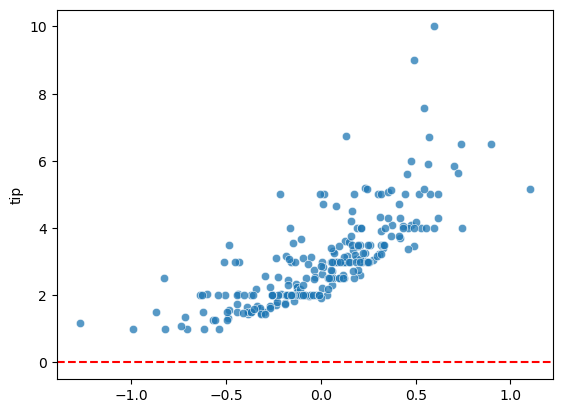

In [49]:
# Criar a matriz design com o log de tip
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', data)

model = sm.OLS(y, X).fit()
sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.60e-21
Time:                        14:36:39   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

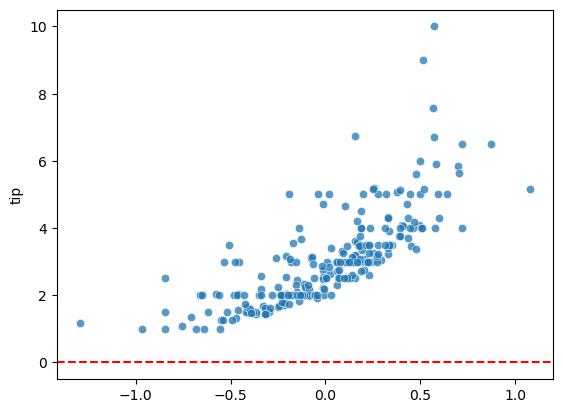

In [50]:
# Segue sendo somente representativo no p-value a variável net_bill

y, X = patsy.dmatrices('np.log(tip) ~ net_bill + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           5.62e-22
Time:                        14:37:19   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

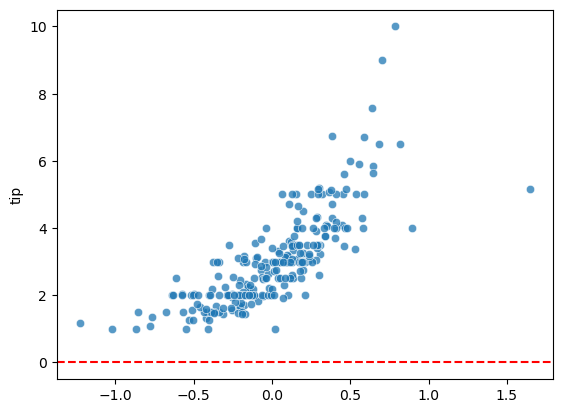

In [52]:
# Testando a transformação dos dados net_bill para log

y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill) + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.82e-22
Time:                        14:38:50   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

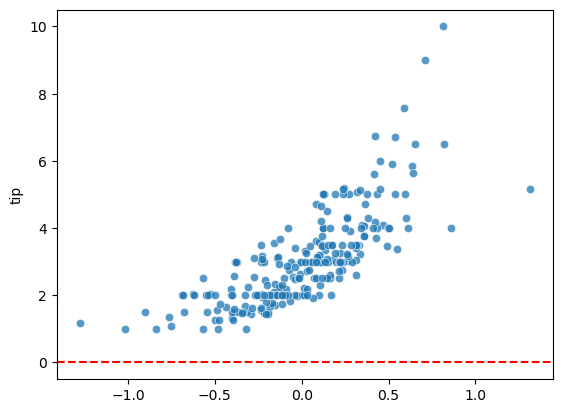

In [60]:
# Testando a transformação dos dados net_bill para polinômio

y, X = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill,2) + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['tip'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

- A transformação de log da variável dependente junto ao modelo polinomial ajudou na melhora dos resultados do R2.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [3]:
data = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\previsao_de_renda (1).csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [5]:
# Deletando dados nulls
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   id_cliente             12427 non-null  int64  
 2   sexo                   12427 non-null  object 
 3   posse_de_veiculo       12427 non-null  bool   
 4   posse_de_imovel        12427 non-null  bool   
 5   qtd_filhos             12427 non-null  int64  
 6   tipo_renda             12427 non-null  object 
 7   educacao               12427 non-null  object 
 8   estado_civil           12427 non-null  object 
 9   tipo_residencia        12427 non-null  object 
 10  idade                  12427 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  12427 non-null  float64
 13  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usage: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:59:45   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

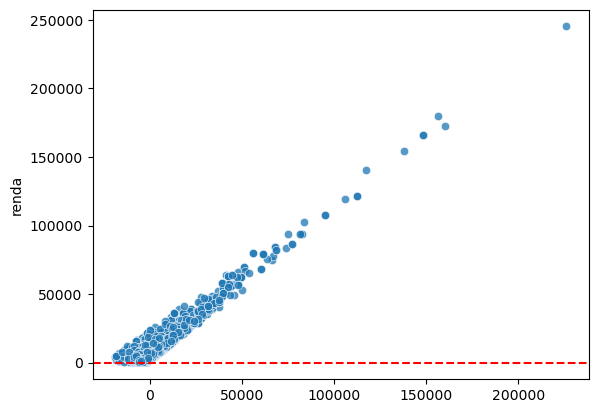

In [6]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['renda'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

- Tanto pelo gráfico como pela R2, vemos que o dado de entrada não consegue explicar bem os dados.
- Em busca de aperfeiçoar o modelo, irei passar todas as variáveis e estudar pelos p-value qual é o melhor para representar.

In [7]:
data

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2016-03-01,11477,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     107.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:00:28   Log-Likelihood:            -1.2950e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12403   BIC:                         2.592e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -184.0814   2643.630     -0.070      0.944   -5366.007    4997.845
C(posse_de_veiculo)[T.True]        1873.7192    151.274     12.386      0.000    1577.198    2170.240
C(posse_de_imovel)[T.True]          169.4126    157.409      1.076      0.282    -139.133     477.958
C(tipo_renda)[T.Bolsista]         -2398.6252   2716.055     -0.883      0.377   -7722.515    2925.265
C(tipo_renda)[T.Empresário]         498.7828    167.967      2.970      0.003     169.542     828.024
C(tipo_renda)[T.Pensionista]      -2314.6815   2716.881     -0.852      0.394   -7640.189    3010.826
C(tipo_renda)[T.Servidor público]  -222.7426    250.082     -0.891      0.373    -712.942     267.457
educacao[T.Pós graduação]          -713.8610   1789.483     -0.399      0.690   -4221.526    2793.804
educacao[T.Secundário]               16.8543    810.716      0.021      0.983   -1572.274    1605.983
educacao[T.Superior completo]       291.9988    813.525      0.359      0.720   -1302.637    1886.634
educacao[T.Superior incompleto]    -399.7365    875.748     -0.456      0.648   -2116.338    1316.865
estado_civil[T.Separado]            151.3600   1252.482      0.121      0.904   -2303.700    2606.420
estado_civil[T.Solteiro]            207.2889   1226.447      0.169      0.866   -2196.738    2611.316
estado_civil[T.União]              -908.5644    283.271     -3.207      0.001   -1463.819    -353.309
estado_civil[T.Viúvo]              -975.4750   1300.776     -0.750      0.453   -3525.199    1574.249
tipo_residencia[T.Casa]           -1415.9828    609.043     -2.325      0.020   -2609.802    -222.164
tipo_residencia[T.Com os pais]    -1250.1211    679.319     -1.840      0.066   -2581.691      81.449
tipo_residencia[T.Comunitário]    -1980.3299   1185.927     -1.670      0.095   -4304.931     344.272
tipo_residencia[T.Estúdio]          542.9535   1118.448      0.485      0.627   -1649.378    2735.285
tipo_residencia[T.Governamental]  -1313.1525    742.152     -1.769      0.077   -2767.885     141.580
tempo_emprego                       519.4207     11.656     44.561      0.000     496.572     542.269
qtd_filhos                         -683.6387   1215.603     -0.562      0.574   -3066.409    1699.132
idade                                21.8446      9.003      2.426      0.015       4.197      39.492
qt_pessoas_residencia               896.2247   1213.451      0.739      0.460   -1482.329    3274.778
==============================================================================
Omnibus:                    17120.510   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7976825.202
Skew:                           7.787   Prob(JB):                         0.00
Kurtosis:    

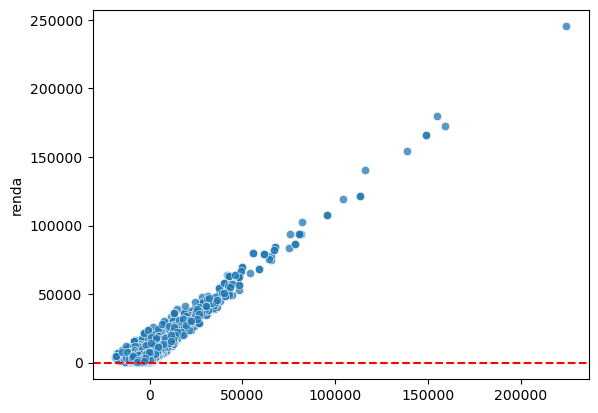

In [9]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + (educacao) + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['renda'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

### Transformações e considerações a serem feitas
- Os dados considerados estatísticamentes significantes são os que apresentam um p-valor abaixo de 0.05 ou 5 %. 
- Para **fins de estudo**, vou levar em conta os atributos abaixo de 0.1 ou 10 %, sendo eles os seguintes:
    - **posse_de_veiculo**
    - **tipo_renda**
    - **estado_civil**
    - **tipo_residencia**
    - **tempo_emprego**
    - **idade**
    
- Entre os atributos acima, idade e tempo de emprego são atributos **quantitativos**, enquanto os outros são **qualitativos**. Isso permite trabalhar com esses dados de formas diferentes, como aplicar transformações logaritmas e polinômiais nos quantitativos e com combinação de classes no qualitativos.
- A variável dependente também é um dado quantitativo, então as transformações possíveis também se aplicam a ela.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     28.78
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:19:16   Log-Likelihood:                -14768.
No. Observations:               12427   AIC:                         2.978e+04
Df Residuals:                   12305   BIC:                         3.069e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================================
                                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                           8.1901      0.204     40.200      0.000       7.791       8.589
posse_de_veiculo[T.True]:tipo_renda[Assalariado]                                                                    0.4742      0.189      2.505      0.012       0.103       0.845
posse_de_veiculo[T.True]:tipo_renda[Bolsista]                                                                    -1.24e-10   1.01e-10     -1.232      0.218   -3.21e-10    7.33e-11
posse_de_veiculo[T.True]:tipo_renda[Empresário]                                                                     0.1988      0.420      0.473      0.636      -0.625       1.022
posse_de_veiculo[T.True]:tipo_renda[Pensionista]                                                                   -0.2599      0.391     -0.665      0.506      -1.026       0.507
posse_de_veiculo[T.True]:tipo_renda[Servidor público]                                                               1.2239      0.541      2.264      0.024       0.164       2.283
tipo_renda[T.Bolsista]:estado_civil[Casado]                                                                         0.0266      0.154      0.173      0.862      -0.275       0.328
tipo_renda[T.Empresário]:estado_civil[Casado]                                                                       0.9426      0.389      2.426      0.015       0.181       1.704
tipo_renda[T.Pensionista]:estado_civil[Casado]                                                                      0.2011      0.433      0.465      0.642      -0.647       1.049
tipo_renda[T.Servidor público]:estado_civil[Casado]                                                                 0.0186      0.321      0.058      0.954      -0.611       0.648
tipo_renda[T.Bolsista]:estado_civil[Separado]                                                                   -3.206e-11    2.6e-11     -1.233      0.218    -8.3e-11    1.89e-11
tipo_renda[T.Empresário]:estado_civil[Separado]                                                                    -0.7387      0.922     -0.802      0.423      -2.545       1.068
tipo_renda[T.Pensionista]:estado_civil[Separado]                                                                  4.04e-11   3.26e-11      1.240      0.215   -2.34e-11    1.04e-10
tipo_renda[T.Servidor público]:estado_civil[Separado]                                                               0.2177      0.305      0.714      0.475      -0.380       0.816
tipo_renda[T.Bolsista]:

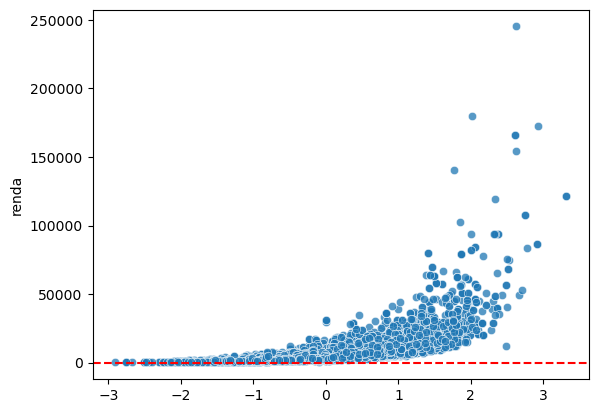

In [101]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego,2) + idade + np.power(idade,2)+ posse_de_veiculo:tipo_renda:estado_civil:tipo_residencia + 1', data)

model = sm.OLS(y, X).fit()

sns.scatterplot(x = model.resid, y= data['renda'], alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

model.summary()

- É possível observar uma melhora no modelo, tanto pelo gráfico de resíduos quanto pelo resultado do R2, o modelo em si não apresentou um resultado satisfatório, visto que o método utilizado (provavelmente) não vai captar relações muito complexas como outros modelos de regressão podem captar, mas já apresenta um resultado bem interessante e satisfatório para o que foi proposto.
- Algo que ajudaria a melhora dos resultados seria um estudo prévio sobre o comportamento das distribuição e quais transformações, ajustes e combinações seriam cabíveis que resultariam em melhora no resultado final.